In [53]:
from binance import Client, ThreadedWebsocketManager, ThreadedDepthCacheManager
import os
from binance.client import Client
import pandas as pd

#apikey = 'P6292qJXnqQ8OnoVTGmrQTOeL7ITxPadzp2Kmn8voLDgf8hUjUZAOll3jqWNaYQg'
#apisecret = 'vOXpLeLba3YT1XmN5VFFLARoqDSowLTSatKVfBNLvbXX0EClqZ7EYyBjx3VJKJrX'

#keys from testnet
binance_api = 'AIaivRIetdq0nB2ArZWFvlbw6kJNVbLII0AuyteBy2QfNHAfAhIs1KBZvEr0ZdFp'
binance_secret = 'Zj5yTSGsNSaYvbsbddMzTaiiYgYboj3nwvzR3V710JXlDI7WLUUKT9wxBGiykoyN'

#Performing authentication
client = Client(binance_api, binance_secret)

In [3]:
tickers = client.get_all_tickers()
tickers

[{'symbol': 'ETHBTC', 'price': '0.05793900'},
 {'symbol': 'LTCBTC', 'price': '0.00245100'},
 {'symbol': 'BNBBTC', 'price': '0.01140700'},
 {'symbol': 'NEOBTC', 'price': '0.00042700'},
 {'symbol': 'QTUMETH', 'price': '0.00230200'},
 {'symbol': 'EOSETH', 'price': '0.00081000'},
 {'symbol': 'SNTETH', 'price': '0.00002505'},
 {'symbol': 'BNTETH', 'price': '0.00039000'},
 {'symbol': 'BCCBTC', 'price': '0.07908100'},
 {'symbol': 'GASBTC', 'price': '0.00012800'},
 {'symbol': 'BNBETH', 'price': '0.19680000'},
 {'symbol': 'BTCUSDT', 'price': '20923.59000000'},
 {'symbol': 'ETHUSDT', 'price': '1212.03000000'},
 {'symbol': 'HSRBTC', 'price': '0.00041400'},
 {'symbol': 'OAXETH', 'price': '0.00017780'},
 {'symbol': 'DNTETH', 'price': '0.00002801'},
 {'symbol': 'MCOETH', 'price': '0.00577200'},
 {'symbol': 'ICNETH', 'price': '0.00166300'},
 {'symbol': 'MCOBTC', 'price': '0.00021140'},
 {'symbol': 'WTCBTC', 'price': '0.00001016'},
 {'symbol': 'WTCETH', 'price': '0.00023700'},
 {'symbol': 'LRCBTC', 'p

In [2]:
#Getting ticker data
tickers = client.get_all_tickers()
ticker_dataframe = pd.DataFrame(tickers)
ticker_dataframe.head()

,symbol,price
0,ETHBTC,0.05802100
1,LTCBTC,0.00245000
2,BNBBTC,0.01141400
3,NEOBTC,0.00042600
4,QTUMETH,0.00230200


In [4]:
ticker_dataframe = pd.DataFrame(tickers)
ticker_dataframe.head()

,symbol,price
0,ETHBTC,0.05793900
1,LTCBTC,0.00245100
2,BNBBTC,0.01140700
3,NEOBTC,0.00042700
4,QTUMETH,0.00230200


In [15]:
depth = client.get_order_book(symbol='ETHUSDT')
depth


{'lastUpdateId': 18336922489,
 'bids': [['1216.10000000', '30.22150000'],
  ['1216.09000000', '8.22720000'],
  ['1216.07000000', '2.64950000'],
  ['1216.06000000', '6.92400000'],
  ['1216.05000000', '5.03010000'],
  ['1216.04000000', '5.00000000'],
  ['1216.03000000', '6.00000000'],
  ['1215.99000000', '9.84550000'],
  ['1215.98000000', '1.81990000'],
  ['1215.96000000', '3.02820000'],
  ['1215.95000000', '81.24630000'],
  ['1215.94000000', '2.20540000'],
  ['1215.92000000', '0.30600000'],
  ['1215.90000000', '0.30590000'],
  ['1215.79000000', '13.69960000'],
  ['1215.74000000', '14.29830000'],
  ['1215.71000000', '0.30000000'],
  ['1215.68000000', '0.04540000'],
  ['1215.65000000', '12.69070000'],
  ['1215.64000000', '0.21320000'],
  ['1215.55000000', '0.98600000'],
  ['1215.48000000', '4.43960000'],
  ['1215.47000000', '0.41130000'],
  ['1215.42000000', '0.41040000'],
  ['1215.41000000', '0.40000000'],
  ['1215.40000000', '8.08290000'],
  ['1215.39000000', '4.99990000'],
  ['1215.370

In [38]:
depth_dataframe = pd.DataFrame(depth['asks'])
depth_dataframe.columns = ['Price', 'Volume']
depth_dataframe.head()

,Price,Volume
0,1216.11000000,14.20870000
1,1216.13000000,1.34440000
2,1216.14000000,4.18070000
3,1216.17000000,10.09320000
4,1216.24000000,2.44310000


In [46]:
historical_data = client.get_historical_klines('BTCUSDT', Client.KLINE_INTERVAL_1MONTH, '15 July 2017')
hist_df = pd.DataFrame(historical_data)

hist_df.columns = ['Open Time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close Time', 'Quote Asset Volume', 
                    'Number of Trades', 'TB Base Volume', 'TB Quote Volume', 'Ignore']
#Convert time from timestamp to time
hist_df['Open Time'] = pd.to_datetime(hist_df['Open Time']/1000, unit='s')
hist_df['Close Time'] = pd.to_datetime(hist_df['Close Time']/1000, unit='s')

#hist_df.head()
#hist_df.tail()

numeric_columns = ['Open', 'High', 'Low', 'Close', 'Volume', 'Quote Asset Volume', 'TB Base Volume', 'TB Quote Volume']
hist_df[numeric_columns] = hist_df[numeric_columns].apply(pd.to_numeric, axis=1)

hist_df.tail()


,Open Time,Open,High,Low,Close,Volume,Close Time,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume,Ignore
55,2022-03-01,43160.00,48189.84,37155.0,45510.34,1.501279e+06,2022-03-31 23:59:59.999000064,6.289731e+10,36913617,7.417745e+05,3.109104e+10,0
56,2022-04-01,45510.35,47444.11,37578.2,37630.80,1.267656e+06,2022-04-30 23:59:59.999000064,5.263118e+10,30889436,6.235529e+05,2.589732e+10,0
57,2022-05-01,37630.80,40023.77,26700.0,31801.04,2.387840e+06,2022-05-31 23:59:59.999000064,7.508377e+10,45431716,1.157755e+06,3.641370e+10,0
58,2022-06-01,31801.05,31982.97,17622.0,19942.21,2.816058e+06,2022-06-30 23:59:59.999000064,6.626456e+10,43144553,1.378711e+06,3.240148e+10,0
59,2022-07-01,19942.21,22527.37,18781.0,20994.30,2.037578e+06,2022-07-31 23:59:59.999000064,4.194182e+10,38667267,1.016706e+06,2.093197e+10,0


In [44]:
import mplfinance as mpf

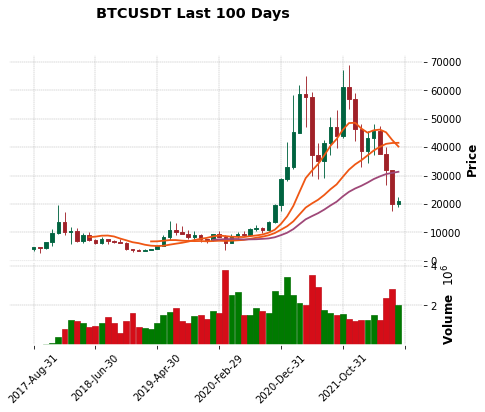

In [45]:
mpf.plot(hist_df.set_index('Close Time').tail(100), 
        type='candle', style='charles', 
        volume=True, 
        title='BTCUSDT Last 100 Days', 
        mav=(10,20,30))

In [58]:
client.API_URL = 'https://testnet.binance.vision/api'
client_account = client.get_account()
client_account




{'makerCommission': 0,
 'takerCommission': 0,
 'buyerCommission': 0,
 'sellerCommission': 0,
 'canTrade': True,
 'canWithdraw': False,
 'canDeposit': False,
 'updateTime': 1657878959413,
 'accountType': 'SPOT',
 'balances': [{'asset': 'BNB',
   'free': '1000.00000000',
   'locked': '0.00000000'},
  {'asset': 'BTC', 'free': '1.00000000', 'locked': '0.00000000'},
  {'asset': 'BUSD', 'free': '10000.00000000', 'locked': '0.00000000'},
  {'asset': 'ETH', 'free': '100.00000000', 'locked': '0.00000000'},
  {'asset': 'LTC', 'free': '500.00000000', 'locked': '0.00000000'},
  {'asset': 'TRX', 'free': '500000.00000000', 'locked': '0.00000000'},
  {'asset': 'USDT', 'free': '10000.00000000', 'locked': '0.00000000'},
  {'asset': 'XRP', 'free': '50000.00000000', 'locked': '0.00000000'}],
 'permissions': ['SPOT']}